# CX Matrix Decompositions for Tumour Classifications

In this example, we are going to replicate one of the experiements from the paper [CUR matrix decompositions for improved data analysis](https://www.pnas.org/doi/10.1073/pnas.0803205106), which uses data from [Nielson et. al. (2002)](https://doi.org/10.1016/S0140-6736(02)08270-3).  We have a dataset of gene expressions for 3,935 genes from 31 different tumours, with three different cancer subtypes represented in the dataset, and the question we want to answer is: can we determine the type of tumour from just a handful of the 4,000 different genes?

We are going to do this by picking genes that have high _leverage scores_.

First step is to import the data:

In [1]:
import pandas
from spalor.models import CUR
from spalor.datasets import Nielsen2002
gex=Nielsen2002()
gex.head()

,GIST,GIST,GIST,GIST,GIST,GIST,GIST,GIST,GIST,GIST,...,LEIO,SARC,SARC,SARC,SARC,SARC,SARC,SARC,SARC,SARC
Gene,,,,,,,,,,,,,,,,,,,,,
TACSTD2,-1.3650,-0.7588,0.33435,1.7160,0.18766,0.1467,0.3831,0.8449,-0.7469,0.9075,...,-0.2423,-1.9880,1.6110,-0.9822,-2.3360,-0.7156,-0.6364,1.8910,-0.4032,-0.3697
GJB2,-0.0950,0.3063,0.63040,0.7806,0.81530,-0.9518,-0.7240,-1.0940,-0.4872,-0.6808,...,-1.5760,0.0433,0.4723,-1.2890,-1.7290,-0.9109,-0.6991,-0.5254,-0.1763,-0.1103
CUGBP2,-0.6385,-0.2870,-0.17250,-0.5951,0.17030,0.6095,-0.1460,0.4343,-0.8280,-0.3281,...,0.1620,-0.0807,0.2439,-3.5830,-0.0795,0.8805,1.6600,2.0190,-0.2785,-0.2276
KIAA0080,-0.5501,1.0980,1.11400,1.0330,-0.34850,0.0632,-0.7378,0.0826,0.6216,-1.3870,...,0.9759,1.2240,-0.6170,-3.1070,0.6073,0.7063,-1.1070,0.5016,-0.0544,-0.7320
CED-6,-0.4295,-3.2950,-2.00600,0.5949,0.48850,-1.3600,-0.5136,-1.5670,1.5310,0.1229,...,-0.8084,0.2960,-0.8529,-1.9260,-0.5620,0.6970,0.8229,2.1340,2.0010,1.5360


In [2]:
genes=gex.index.to_numpy();
cancer_type=gex.columns
data=gex.to_numpy().T

Theres a function in SpaLor for calculating the leverage scores.  It requires a rank, but this is not the same as the number of columns we hope to sample.  The leverage scores are how important a given column is when we are constructing a rank _r_ approximation of the matrix.  We are going to calculate and plot them here:

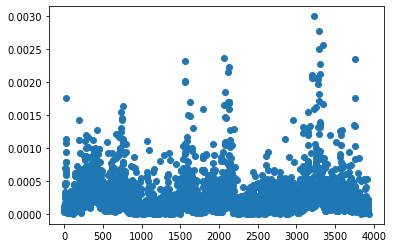

In [105]:
from spalor.matrix_tools import leverage_score
from matplotlib import pyplot as plt

ls=leverage_score(data,k=3, axis=1)
plt.plot(ls,'o')
plt.show()

A good way to think about this plot is that the genes in this plot that have a much larger leverage score than average are the ones that contain the most information. When we fit our data to a CX model from SpaLoR, its going to randomly sample genes with a probability proportional to the leverage score squared.

In [155]:
# from spalor.models.cx import CX
import numpy as np
import pandas as pd
cx=CX(n_components=30, method="exact")
C=cx.fit_transform(data)
C=pd.DataFrame(C, columns=genes[cx.cols], index=cancer_type)
print("genes selected: ",genes[cx.cols])

genes selected:  ['ANXA1' 'IGKC' 'FLJ20898' 'CSF2RB' 'RNF24' 'IGKC' 'C20ORF1' 'ZFHX1B'
 'RPS27' 'CD24' 'PCOLCE' 'DUSP6' 'EPS8' 'SSBP2' 'CEP2' 'GFRA2' 'FLJ20701'
 'KIAA0008' 'KIAA0300' 'FLJ14054' 'COPEB' 'IGF2' 'TYROBP' 'IMPA2' 'RAB39'
 'OSF-2' 'APLP2' nan 'EIF2B3' 'EDN3']


Here is the same plot as before with the selected genes highlighted red.  Most of them have a high leverage score, but some do not.

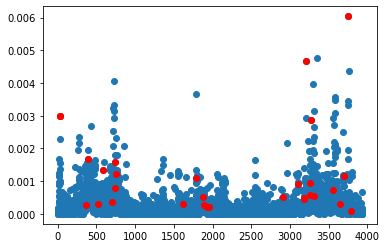

In [156]:
plt.plot(ls,'o')
ls=leverage_score(data,k=1, axis=1)

#cols=np.where(20* ls > np.random.rand(*ls.shape))[0]
plt.plot(cx.cols, ls[cx.cols],'or')
plt.show()

A clustermap of the genes shows the limited gene set can seperate the three different types of cancer.

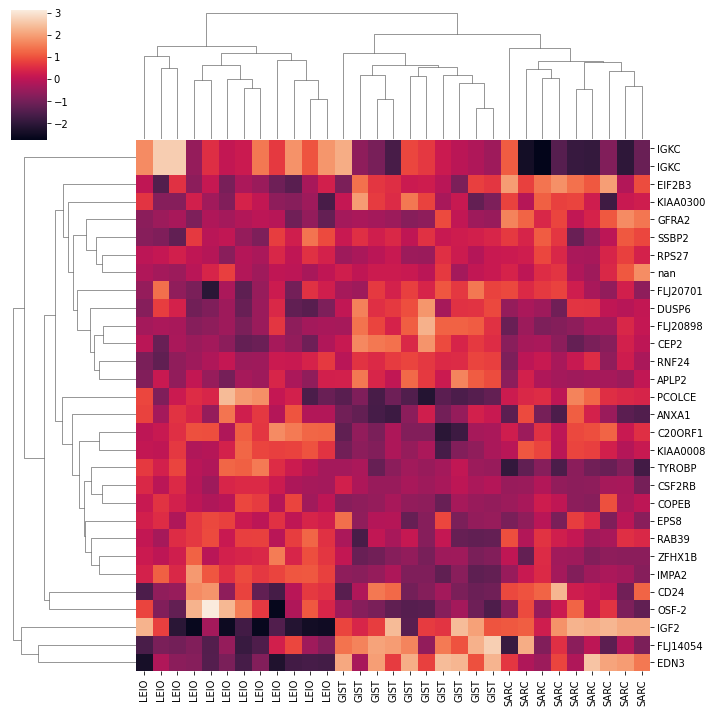

In [166]:
import seaborn as sns
sns.clustermap(C.T, col_cluster=1, z_score=1)